## Module 6.1.4

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longtitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Import citipy module
from citipy import citipy

In [4]:
# Add the latitudes and longtitudes to a list
coordinates = list(lat_lngs)
coordinates

[(-26.45534911372456, 8.247888683174324),
 (-54.712505548167826, -16.13369217255058),
 (53.577893467053286, -10.907574449154595),
 (-73.39878199457041, 102.6356828420333),
 (56.22704902177668, -123.50031741780025),
 (-60.21692375146772, -163.176560474748),
 (-4.006137753790753, -157.10202177461008),
 (-89.90393097047394, 44.97254069584224),
 (14.226591322742863, 85.23831826780861),
 (-47.09492855553863, 62.30319631695818),
 (14.538545754251487, -153.48933756634398),
 (-72.14067357404244, 93.09442014866119),
 (-56.435913736579295, -156.25820916750075),
 (4.193388881410769, 83.70505264840335),
 (29.137331904294896, -61.566551413676095),
 (54.13801631670313, -11.272681041127555),
 (-4.256127334172689, -16.580499409459463),
 (-1.8267095933363748, -138.2469158390052),
 (-31.94236237738938, 21.43466665290825),
 (39.555292859967864, 85.11782778122671),
 (-74.96011638138488, 118.76439498594362),
 (18.240158257965817, 102.67675106469909),
 (-84.24289921677537, 133.7716333144146),
 (-15.02702500

In [5]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each lat and long combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient number of cities in the list
len(cities)

627

In [6]:
# Import the requests library
import requests
# Import API key
import sys

sys.path.append('../')
# Import the API key
from config import weather_api_key


In [7]:
# Starting URL for weather Map API call
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c971f9fb98ac4976add5f0dfe44be1aa


In [8]:
# Create an endpoint URL for a city
city_url = url + "&q=" + "sitka"
print(city_url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c971f9fb98ac4976add5f0dfe44be1aa&q=sitka


## Module 6.2.6

In [9]:
# Import the time library and the datefime module from the datetime library
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginnof of the logging
print("Beginning Data Retrieval       ")
print ("------------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval       
------------------------------


In [11]:
# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #Log the URL, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count +=1
    
    # Run an API request for each of the cities
    try:
        # Parse the json and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        # Convert the date to SIO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})

    #Error check
    except Exception as e:
        print(e)
        print("City not found. Skipping...")
        pass
    
# Indicate loading is complete
print("-------------------------")
print("Data Retrieval Complete  ")
print("-------------------------")

Processing Record 1 of Set 1 | luderitz
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | westport
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | mackenzie
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | faanui
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | yanam
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | hambantota
Processing Record 15 of Set 1 | saint george
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | korla
Processing Record 20 of Set 1 | vientiane
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | odweyne
Processing Record 23 of Set 1 | uribia
Processing Record 24 of Set 1 | margate
Processing Record 25 of Set 

Processing Record 39 of Set 4 | mahebourg
Processing Record 40 of Set 4 | caraballeda
Processing Record 41 of Set 4 | gopalpur
Processing Record 42 of Set 4 | khorramshahr
Processing Record 43 of Set 4 | ancud
Processing Record 44 of Set 4 | maniitsoq
Processing Record 45 of Set 4 | leningradskiy
Processing Record 46 of Set 4 | hofn
Processing Record 47 of Set 4 | komsomolskiy
Processing Record 48 of Set 4 | ushtobe
Processing Record 49 of Set 4 | altay
Processing Record 50 of Set 4 | necochea
Processing Record 1 of Set 5 | marcona
'coord'
City not found. Skipping...
Processing Record 2 of Set 5 | karratha
Processing Record 3 of Set 5 | kastornoye
Processing Record 4 of Set 5 | malakal
Processing Record 5 of Set 5 | te anau
Processing Record 6 of Set 5 | paranhos
Processing Record 7 of Set 5 | hercegszanto
Processing Record 8 of Set 5 | grand river south east
'coord'
City not found. Skipping...
Processing Record 9 of Set 5 | saldanha
Processing Record 10 of Set 5 | yei
Processing Recor

Processing Record 21 of Set 8 | bubaque
Processing Record 22 of Set 8 | flinders
Processing Record 23 of Set 8 | olafsvik
Processing Record 24 of Set 8 | bathsheba
Processing Record 25 of Set 8 | tiznit
Processing Record 26 of Set 8 | leua
Processing Record 27 of Set 8 | abu zabad
Processing Record 28 of Set 8 | lapeer
Processing Record 29 of Set 8 | pegnitz
Processing Record 30 of Set 8 | grindavik
Processing Record 31 of Set 8 | marawi
Processing Record 32 of Set 8 | nam tha
'coord'
City not found. Skipping...
Processing Record 33 of Set 8 | shimoda
Processing Record 34 of Set 8 | oistins
Processing Record 35 of Set 8 | vikravandi
Processing Record 36 of Set 8 | de aar
Processing Record 37 of Set 8 | pevek
Processing Record 38 of Set 8 | luanda
Processing Record 39 of Set 8 | antofagasta
Processing Record 40 of Set 8 | putina
Processing Record 41 of Set 8 | diamantino
Processing Record 42 of Set 8 | east london
Processing Record 43 of Set 8 | mishelevka
Processing Record 44 of Set 8 

Processing Record 11 of Set 12 | dolbeau
'coord'
City not found. Skipping...
Processing Record 12 of Set 12 | ksenyevka
'coord'
City not found. Skipping...
Processing Record 13 of Set 12 | yambio
Processing Record 14 of Set 12 | mwene-ditu
Processing Record 15 of Set 12 | tuzha
Processing Record 16 of Set 12 | sabang
Processing Record 17 of Set 12 | vestmannaeyjar
Processing Record 18 of Set 12 | malpur
Processing Record 19 of Set 12 | frontera
Processing Record 20 of Set 12 | hearst
Processing Record 21 of Set 12 | bajo baudo
'coord'
City not found. Skipping...
Processing Record 22 of Set 12 | haines junction
Processing Record 23 of Set 12 | asau
Processing Record 24 of Set 12 | mayor pablo lagerenza
Processing Record 25 of Set 12 | mahina
Processing Record 26 of Set 12 | codrington
Processing Record 27 of Set 12 | liverpool
Processing Record 28 of Set 12 | pingliang
Processing Record 29 of Set 12 | los llanos de aridane
Processing Record 30 of Set 12 | leeuwarden
Processing Record 31

In [50]:
# Print the city count to confirm sufficient number of cities in the list
len(city_data)

574

In [51]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Luderitz,-26.6481,15.1594,65.91,84,4,9.35,NA,2023-01-19 01:01:38
1,Jamestown,42.0970,-79.2353,35.24,60,100,5.75,US,2023-01-19 00:54:13
2,Westport,41.1415,-73.3579,47.08,69,0,12.66,US,2023-01-19 01:01:39
3,Albany,42.6001,-73.9662,40.68,81,100,7.00,US,2023-01-19 00:58:55
4,Mackenzie,55.2999,-123.1698,28.42,93,100,5.17,CA,2023-01-19 01:00:29
5,Avarua,-21.2078,-159.7750,78.85,89,40,13.80,CK,2023-01-19 00:56:09
6,Faanui,-16.4833,-151.7500,80.74,72,7,14.09,PF,2023-01-19 01:01:42
7,Port Alfred,-33.5906,26.8910,74.17,86,100,1.99,ZA,2023-01-19 01:00:27
8,Yanam,16.7333,82.2167,63.93,96,71,2.75,IN,2023-01-19 01:01:43
9,Saint-Philippe,-21.3585,55.7679,76.59,88,94,12.88,RE,2023-01-19 00:56:24


In [52]:
# Reorder results of table to reade Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed
new_column_order = ["City", "Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Luderitz,NA,2023-01-19 01:01:38,-26.6481,15.1594,65.91,84,4,9.35
1,Jamestown,US,2023-01-19 00:54:13,42.0970,-79.2353,35.24,60,100,5.75
2,Westport,US,2023-01-19 01:01:39,41.1415,-73.3579,47.08,69,0,12.66
3,Albany,US,2023-01-19 00:58:55,42.6001,-73.9662,40.68,81,100,7.00
4,Mackenzie,CA,2023-01-19 01:00:29,55.2999,-123.1698,28.42,93,100,5.17
5,Avarua,CK,2023-01-19 00:56:09,-21.2078,-159.7750,78.85,89,40,13.80
6,Faanui,PF,2023-01-19 01:01:42,-16.4833,-151.7500,80.74,72,7,14.09
7,Port Alfred,ZA,2023-01-19 01:00:27,-33.5906,26.8910,74.17,86,100,1.99
8,Yanam,IN,2023-01-19 01:01:43,16.7333,82.2167,63.93,96,71,2.75
9,Saint-Philippe,RE,2023-01-19 00:56:24,-21.3585,55.7679,76.59,88,94,12.88


In [53]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Module 6.3.1 Plotting Data for school project

In [54]:
# Extract relevant fields from the dataframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


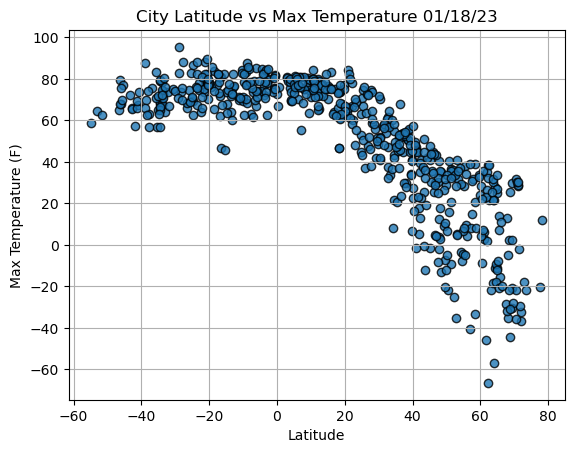

In [55]:
# Import the time module to set date and time
import time
# Build the scatter plot for latitude vs max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black",
            linewidths=1,
            marker = "o",
            alpha=0.8,
            label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature "+time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1_maxTemp.png")

# Show plot
plt.show()


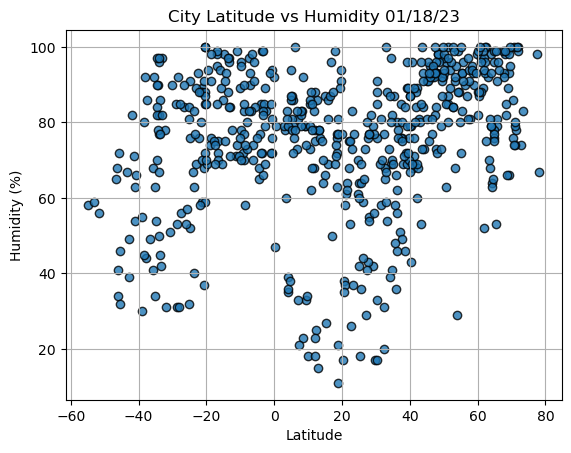

In [56]:
# Build the scatter plot for latitude vs Humidity
plt.scatter(lats,
            humidity,
            edgecolor="black",
            linewidths=1,
            marker = "o",
            alpha=0.8,
            label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity "+time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2_humidity.png")

# Show plot
plt.show()

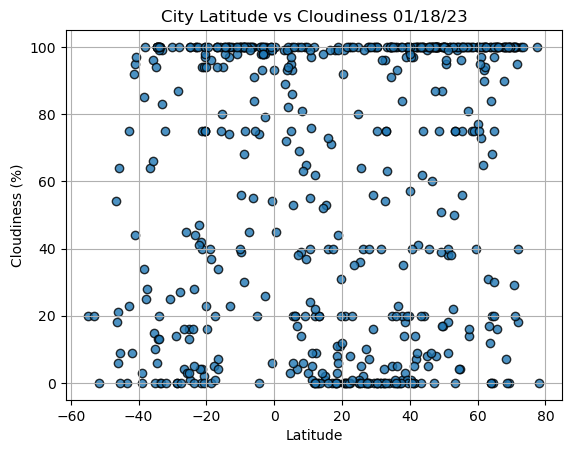

In [57]:
# Build the scatter plot for latitude vs Cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black",
            linewidths=1,
            marker = "o",
            alpha=0.8,
            label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness "+time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3_cloudiness.png")

# Show plot
plt.show()

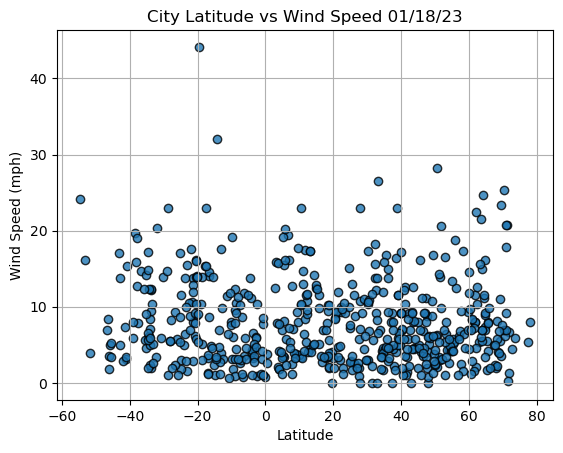

In [58]:
# Build the scatter plot for latitude vs Wind Speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black",
            linewidths=1,
            marker = "o",
            alpha=0.8,
            label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed "+time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4_windSpeed.png")

# Show plot
plt.show()

## Add Linear Regression to the above Scatter Plots

In [67]:
# Import linregress
from scipy.stats import linregress

# Create a function to create linear regression on the weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):


    # Run regression on hemisphere weather data - linear regression.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [69]:
# Create a datafram from a datafram based on a single index
index13 = city_data_df.loc[13]
index13

City                   Hambantota
Country                        LK
Date          2023-01-19 00:54:25
Lat                        6.1241
Lng                       81.1185
Max Temp                    70.14
Humidity                      100
Cloudiness                     20
Wind Speed                   5.75
Name: 13, dtype: object

In [70]:
# Create Norther and Souithern hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Luderitz,NA,2023-01-19 01:01:38,-26.6481,15.1594,65.91,84,4,9.35
5,Avarua,CK,2023-01-19 00:56:09,-21.2078,-159.7750,78.85,89,40,13.80
6,Faanui,PF,2023-01-19 01:01:42,-16.4833,-151.7500,80.74,72,7,14.09
7,Port Alfred,ZA,2023-01-19 01:00:27,-33.5906,26.8910,74.17,86,100,1.99
9,Saint-Philippe,RE,2023-01-19 00:56:24,-21.3585,55.7679,76.59,88,94,12.88
...,...,...,...,...,...,...,...,...,...
557,Broken Hill,AU,2023-01-19 01:18:48,-31.9500,141.4333,66.92,31,0,20.33
563,Port Hedland,AU,2023-01-19 01:18:51,-20.3167,118.5667,77.05,100,75,10.36
568,Maragogi,BR,2023-01-19 01:16:45,-9.0122,-35.2225,77.00,85,30,7.87
571,Kavieng,PG,2023-01-19 01:18:55,-2.5744,150.7967,84.63,69,26,10.33


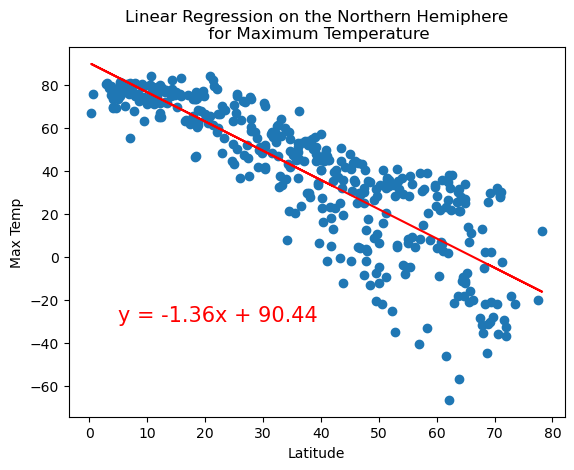

In [72]:
# Linear regresssion on the Northern hemiphere (requires cell 37) and Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemiphere\n for Maximum Temperature",
                       "Max Temp",(5,-30))

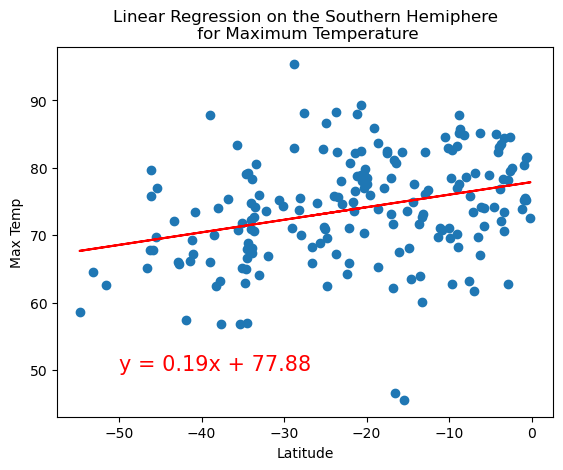

In [77]:
# Linear regresssion on the Southern hemiphere (requires cell 37) and Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemiphere\n for Maximum Temperature",
                       "Max Temp",(-50,50))

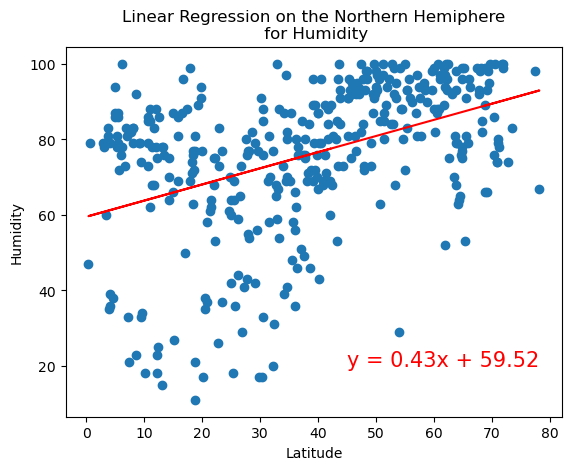

In [78]:
# Linear regresssion on the Northern hemiphere (requires cell 37) and Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemiphere\n for Humidity",
                       "Humidity",(45,20))

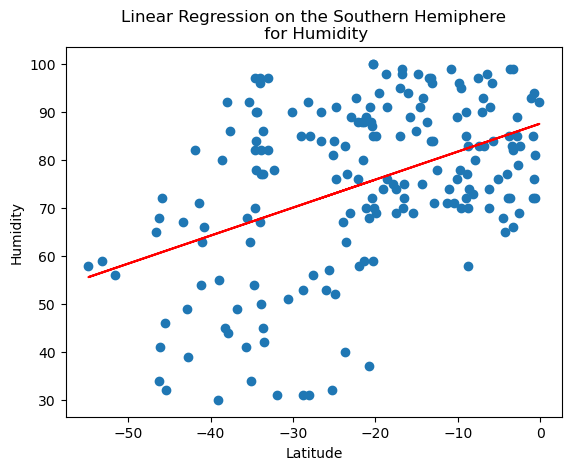

In [79]:
# Linear regresssion on the Southern hemiphere (requires cell 37) and Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemiphere\n for Humidity",
                       "Humidity",(45,20))

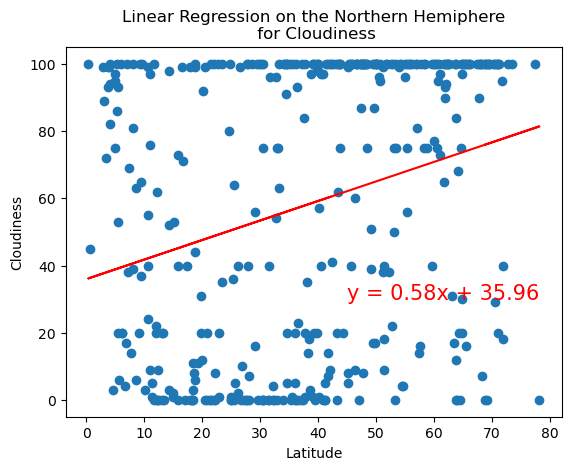

In [80]:
# Linear regresssion on the Northern hemiphere (requires cell 37) and Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemiphere\n for Cloudiness",
                       "Cloudiness",(45,30))

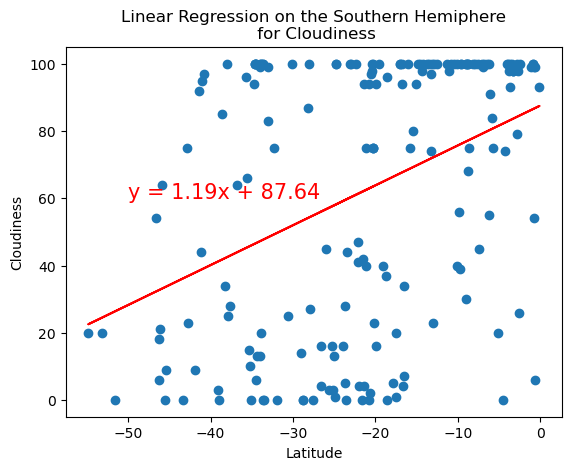

In [81]:
# Linear regresssion on the Southern hemiphere (requires cell 37) and Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemiphere\n for Cloudiness",
                       "Cloudiness",(-50,60))

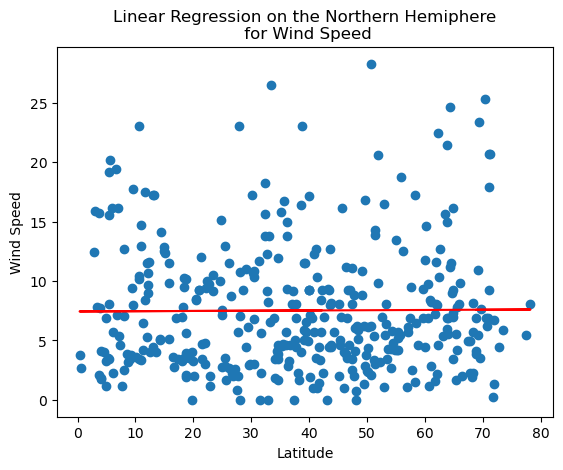

In [82]:
# Linear regresssion on the Northern hemiphere (requires cell 37) and Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemiphere\n for Wind Speed",
                       "Wind Speed",(10,35))

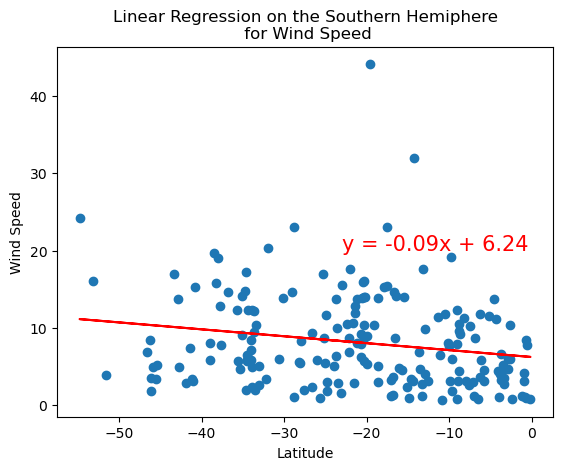

In [83]:
# Linear regresssion on the Southern hemiphere (requires cell 37) and Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemiphere\n for Wind Speed",
                       "Wind Speed",(-23,20))

## GeoView Weather Maps

In [87]:
# Import the required libraries
import hvplot.pandas
import pandas as pd

In [88]:
# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [89]:
# Stors the CSV you saved (created in part 1) into a dataframe
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Luderitz,NaN,2023-01-19 01:01:38,-26.6481,15.1594,65.91,84,4,9.35
1,1,Jamestown,US,2023-01-19 00:54:13,42.0970,-79.2353,35.24,60,100,5.75
2,2,Westport,US,2023-01-19 01:01:39,41.1415,-73.3579,47.08,69,0,12.66
3,3,Albany,US,2023-01-19 00:58:55,42.6001,-73.9662,40.68,81,100,7.00
4,4,Mackenzie,CA,2023-01-19 01:00:29,55.2999,-123.1698,28.42,93,100,5.17


In [90]:
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [91]:
# Configure the GeoView map
map_plot_1 = city_data_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM")

# Display the map plot
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]

In [92]:
# Configure the GeoView map
map_plot_2 = city_data_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500)

# Display the map plot
map_plot_2

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]

In [93]:
# Configure the GeoView map - Customized
map_plot_3 = city_data_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    size = "Max Temp",
    scale = 0.5,
    color = "City")

# Display the map plot
map_plot_3

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (City,Max Temp)

In [94]:
# Configure the GeoView map
map_plot_4 = city_data_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "EsriNatGeo",
    frame_width = 700,
    frame_height = 500,
    size = "Max Temp",
    scale = 0.5,
    color = "City")

# Display the map plot
map_plot_4

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (City,Max Temp)

In [95]:
# Configure the GeoView map - Wind Speed
map_plot_5 = city_data_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "EsriNatGeo",
    frame_width = 700,
    frame_height = 500,
    size = "Wind Speed",
    scale = 0.7,
    color = "City")

# Display the map plot
map_plot_5

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (City,Wind Speed)

## Create Weather Search Map - Module 6.5.3

In [96]:
# Ask the customer to add a minimum and maximum temperature value
min_temp = float(input("What is the minimum temperature you would like for your trip?"))
max_temp = float(input("What is the maximum temperature you would like for your trip?"))

What is the minimum temperature you would like for your trip?75
What is the maximum temperature you would like for your trip?90


In [98]:
preferred_cities_df = city_data_df.loc[
    (city_data_df["Max Temp"] <= max_temp) & (city_data_df["Max Temp"] >= min_temp)
]

preferred_cities_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
5,5,Avarua,CK,2023-01-19 00:56:09,-21.2078,-159.7750,78.85,89,40,13.80
6,6,Faanui,PF,2023-01-19 01:01:42,-16.4833,-151.7500,80.74,72,7,14.09
9,9,Saint-Philippe,RE,2023-01-19 00:56:24,-21.3585,55.7679,76.59,88,94,12.88
10,10,Hilo,US,2023-01-19 00:54:38,19.7297,-155.0900,77.25,91,31,4.00
12,12,Mataura,NZ,2023-01-19 00:53:55,-46.1927,168.8643,79.65,34,6,3.53
...,...,...,...,...,...,...,...,...,...,...
566,566,Yaan,NG,2023-01-19 01:18:52,7.3833,8.5667,78.26,21,69,4.61
567,567,La Asuncion,VE,2023-01-19 01:15:26,11.0333,-63.8628,75.52,85,9,12.95
568,568,Maragogi,BR,2023-01-19 01:16:45,-9.0122,-35.2225,77.00,85,30,7.87
571,571,Kavieng,PG,2023-01-19 01:18:55,-2.5744,150.7967,84.63,69,26,10.33


In [99]:
# Check for null values
preferred_cities_df.count()

City_ID       143
City          143
Country       142
Date          143
Lat           143
Lng           143
Max Temp      143
Humidity      143
Cloudiness    143
Wind Speed    143
dtype: int64

In [101]:
preferred_cities_df.isnull().sum()


City_ID       0
City          0
Country       1
Date          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
dtype: int64

In [103]:
# Create dataframe called hotel_df to stor hotel names along with city, country, max temp, and coordinates
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
5,Avarua,CK,78.85,-21.2078,-159.7750,
6,Faanui,PF,80.74,-16.4833,-151.7500,
9,Saint-Philippe,RE,76.59,-21.3585,55.7679,
10,Hilo,US,77.25,19.7297,-155.0900,
12,Mataura,NZ,79.65,-46.1927,168.8643,
15,Georgetown,MY,80.53,5.4112,100.3354,
16,Atuona,PF,78.44,-9.8000,-139.0333,
17,Carnarvon,AU,86.63,-24.8667,113.6333,
22,Uribia,CO,79.27,11.7139,-72.2660,
26,Neiafu,TO,83.62,-18.6500,-173.9833,


## Hotels from Geoapi Places API

In [46]:
# Set initial parameters to search for a hotel
# Import the requests library
import requests

# Import the API key
from config import geoapify_key

# Set initial parameters to search for a hotel
radius = 5000
params = {
    "categories":"accomodation.hotel",
    "apiKey": geoapify_key,
}